# Patrones con K-means

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

## Ingresamos Datos

In [52]:
titanic_pre = pd.read_csv("titanic.csv")

## Eliminar variables que no sirven

### Eliminamos datos que no serviran

In [53]:
titanic = titanic_pre.drop(columns=["PassengerId","Name","Ticket","Cabin"])

### Transfomamos datos

In [54]:
titanic = titanic.replace({"male":0,"female":1})
titanic = titanic.replace({"S":0,"C":1,"Q":2})
nVariables = titanic.columns.values
for n in nVariables:
    titanic[n] = titanic[n].fillna(titanic[n].median())

### Analizamos Correlacion

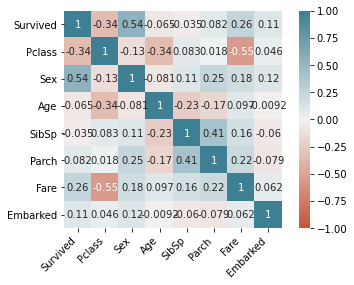

In [55]:
#Pondre un diagrama de correlacion solo para tenerlo a la vista
ax = sns.heatmap(
    titanic.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()
#Eliminamos despues la fila de sobrevivir
titanic = titanic.drop(columns=["Survived"])

### Eliminamos datos por correlacion

In [56]:
#Seleccionamos si queremos eliminar datos o no
Elim = "Y" #Y/N
if Elim == "Y":
    #Es el unico dato que se be bastante alejado
    titanic = titanic.drop(columns=["Pclass"])

### Razon

Se eliminan "PassengerId","Name","Ticket","Cabin", ya que tu numero de pasajero no afectara a si sobrevives o no, asi como el nombre, o tu tiquet, en el caso de cabina es debido a que hay demasiados espacios vacios, que solamente harian ruido.  
Se elimina "Pclass" ya que es el unico valor que aparentemente no tiene mucha correlacion con si se sobrevive o no.   
Se elimina "Survived" ya que es lo que buscamos.  

## Determinar k

In [57]:
k = 2; #Por que solo pueden sobrevivir o no sobrevivir

## scikitlearns para determinar los centros

### Determina Centros

In [58]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(titanic)

### Muestra los centros

In [59]:
print(kmeans.cluster_centers_)

[[  0.33412888  29.22106205   0.51431981   0.349642    22.41194248
    0.349642  ]
 [  0.64150943  31.58339623   0.66037736   0.88679245 187.03285849
    0.54716981]]


### Muestra las etiquetas

In [60]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Preguntas

## ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

En este caso no, ya que no tienen mucha relacion entre los datos que se tienen del archivo original si sobrevivio o no y lo que nos da en este caso, se puede deber a que no se tienen suficientes datos en nuestra entrada o nuetsros datos no tienen mucha realcion con lo que buscamos.

## ¿Cómo obtuviste el valor de k a usar?

Sabiendo cuales son los posibles resultados que podiamos tener, que son si sobrevivio o no sobrevivio, estos son 2 valores, por lo que k = 2.

## ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Podrian ser mas representativos si despues de ubicar los centros deducimos cuales pertenecen a sobrevivir y cuales a no sobrevivir.

## ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?

In [70]:
distancia = (kmeans.cluster_centers_[0]-kmeans.cluster_centers_[1])**2;
distancia = sum(distancia)**(1/2)
print(distancia)

164.63921153135882


Los centros tienen una distancia de 164.6392, solamente son 2 centros por lo que la distancia entre ellos es 1 solamente.

## ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Si tuvieramos muchos outliers los valores serian muy poco exactos, ya que estos valores fuera de rangos haran que nuestros centros se ubiquen en partes en las que talvez no nos sean utiles.

## ¿Qué puedes decir de los datos basándose en los centros?

Basado en los centros tenemos que es mucho mas probable que te encuentres en el centro 0 que en el centro 1, lo cual nos indica que o nuestros datos tienen muchos outliers o no tienen mucha relacion para poder decir si sobrevives o no.